In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

from langchain_groq import ChatGroq

llm = ChatGroq(model = 'qwen-qwq-32b')
llm.invoke('Hey There!')

AIMessage(content='\n<think>\nOkay, the user said "Hey There!" which is a casual greeting. I should respond in a friendly and approachable manner. Let me make sure to keep the tone positive and open. Maybe ask how I can assist them today. I should avoid any technical jargon and keep it simple. Let me check if there\'s anything else I need to consider. No, that\'s about it. Alright, time to put it all together.\n</think>\n\nHey there yourself! 😊 How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 104, 'prompt_tokens': 13, 'total_tokens': 117, 'completion_time': 0.238503275, 'prompt_time': 0.002725686, 'queue_time': 0.083551448, 'total_time': 0.241228961}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_ea798e78f0', 'finish_reason': 'stop', 'logprobs': None}, id='run-03c53fb9-8c68-4a65-99be-f313b47588f9-0', usage_metadata={'input_tokens': 13, 'output_tokens': 104, 'total_tokens': 117})

In [3]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

##### Defining the State of the Graph

In [11]:
class State(TypedDict):
    topic: str
    base_code: str
    review: str
    docstring: str
    

    
    

##### Designing the Graph Nodes

In [20]:
def generate_code(state):
    
    """ You are an expert Python or Software developer.
    You will generate code based on the topic provided.
    """
    
    messages = llm.invoke(f"Genrate the code based on the topic: {state['topic']}")
    return {"base_code": messages.content}


def review_code(state):
    '''Review the code that has been generated and provide any feedback for any improvisations'''
    
    messages = llm.invoke(f'Review the code in detail:{state["base_code"]}')
    return {"review": messages.content}

def reviews(state):
    '''Review the code and provide feedback for any improvisation'''
    if not "try()" or "catch()" in state['base_code']:
        return "There is no error handling in the code. Please add try and catch blocks to handle exceptions."
    return 'Pass'

def generate_docstring(state):
    '''Generate a docstring and comments for the code'''
    
    messages = llm.invoke(f'Generate a docstring: {state["review"]}')
    return {"docstring": messages.content}

##### Creating the Graph

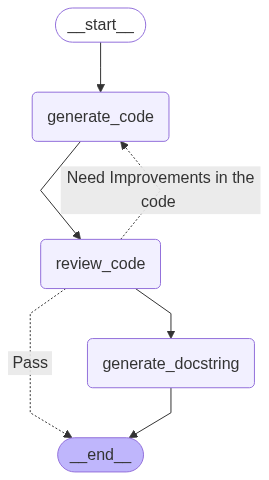

In [21]:
code_peer_review_graph = StateGraph(State)

code_peer_review_graph.add_node('generate_code', generate_code)
code_peer_review_graph.add_node('review_code', review_code)
# code_peer_review_graph.add_node('reviews', reviews)
code_peer_review_graph.add_node('generate_docstring', generate_docstring)

code_peer_review_graph.add_edge(START, 'generate_code')
code_peer_review_graph.add_edge('generate_code', 'review_code')
code_peer_review_graph.add_conditional_edges('review_code', reviews, {'Need Improvements in the code': 'generate_code', 'Pass': END})
code_peer_review_graph.add_edge('review_code', 'generate_docstring')
code_peer_review_graph.add_edge('generate_docstring', END)


code_review_graph = code_peer_review_graph.compile()

display(Image(code_review_graph.get_graph().draw_mermaid_png()))

In [22]:
# Invoking the workflow

messages = code_review_graph.invoke({f"topic": 'Generate a code to find reverse of two integers'})
messages

{'topic': 'Generate a code to find reverse of two integers',
 'base_code': '\n<think>\nOkay, so the user wants a program that finds the reverse of two integers. Hmm, let me think. First, I need to understand what exactly is required here. Reversing two integers—does that mean taking each integer separately and reversing them, then maybe outputting both results?\n\nAlright, so the steps would be: get two numbers from the user, reverse each one, then display both reversed numbers. Let\'s start by planning the code structure.\n\nMaybe start with a function to reverse a single integer. That makes sense because then I can reuse it for both numbers. How do you reverse an integer? Well, the usual method is to take each digit from the end and build a new number. Let\'s see, for example, if the number is 123, reversing would be 321.\n\nWait, but what about negative numbers? Oh right, the problem might assume positive numbers, but it\'s better to handle negatives. Let me think. If the input is -